In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


replace blanks with 0 and convert the datatype of TotalCharges to Float

In [73]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [75]:
df.isnull().sum().sum()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [76]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [77]:
df.duplicated().sum()

0

#CONVERTED O & 1 VALUES OF SENIOR CITIZEN TO YES & NO

In [91]:
# def conv(value):
#     if(value == 0):
#         return "No"
#     else: 
#         return "Yes"
# df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


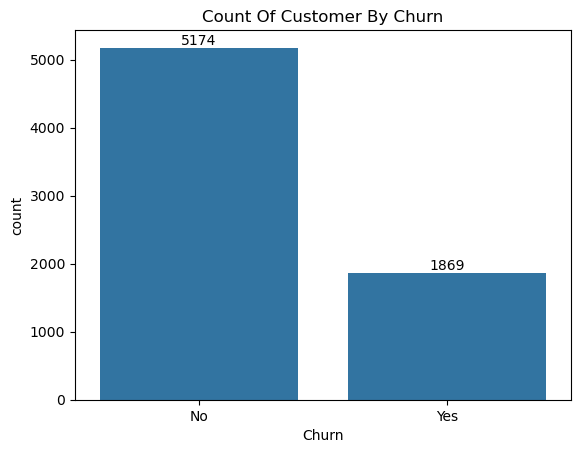

In [135]:
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count Of Customer By Churn")
plt.show()

Churn

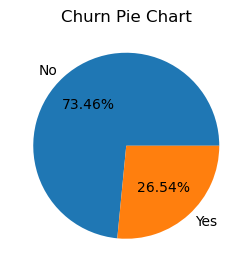

In [141]:
gb =df.groupby("Churn").agg({'Churn': 'count'})
plt.figure(figsize=(3,4))
plt.title("Churn Pie Chart")
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.show()

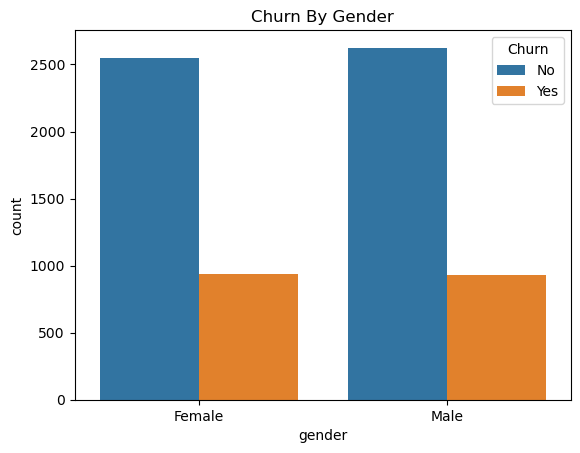

<Figure size 300x300 with 0 Axes>

In [161]:
sns.countplot(x = 'gender', data = df, hue = "Churn")
plt.title("Churn By Gender")
plt.figure(figsize=(3,3))
plt.show()

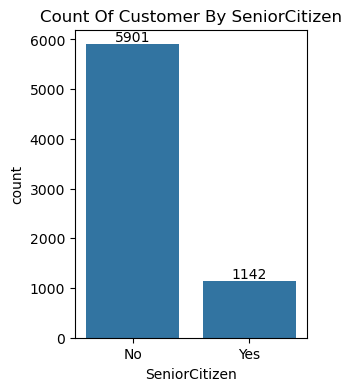

In [175]:
plt.figure(figsize = (3,4))    
ax = sns.countplot(x = 'SeniorCitizen', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count Of Customer By SeniorCitizen")
plt.show()

<Figure size 400x400 with 0 Axes>

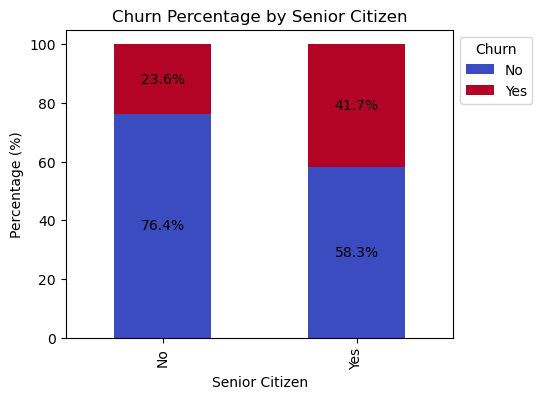

In [181]:
# Create count table
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])
plt.figure(figsize = (4,4))    

# Convert to percentage
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

# Plot stacked bar
ax = ct_pct.plot(kind='bar', stacked=True, figsize=(5,4), colormap='coolwarm')

# Add percentage labels inside bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Titles and labels
plt.title('Churn Percentage by Senior Citizen')
plt.ylabel('Percentage (%)')
plt.xlabel('Senior Citizen')
plt.legend(title='Churn', bbox_to_anchor=(1,1))

plt.show()

<Axes: xlabel='tenure', ylabel='Count'>

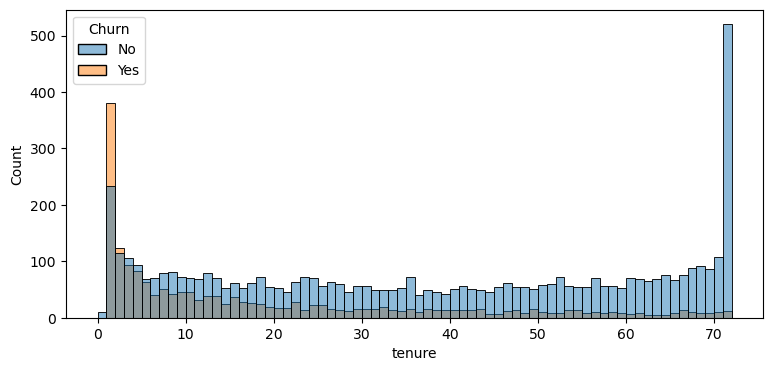

In [201]:
plt.figure(figsize = (9,4))    
sns.histplot(x = "tenure", data = df, bins = 72, hue = 'Churn')


#People who have used our services for a long time have stayed and people who have used our services
for 1 or 2 months have churned.

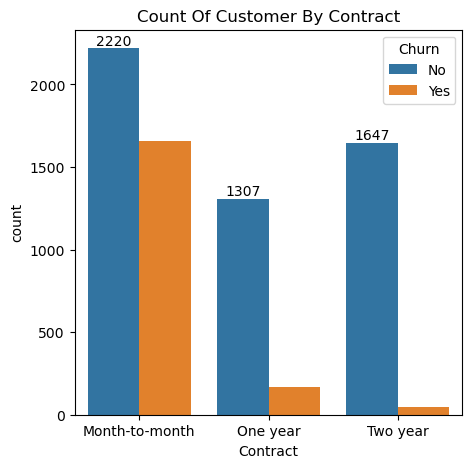

In [220]:
plt.figure(figsize = (5,5))    
ax = sns.countplot(x = 'Contract', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count Of Customer By Contract")
plt.show()

#People who have month to month contract are likely to churn then from those who have 1-2 year contract

In [225]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

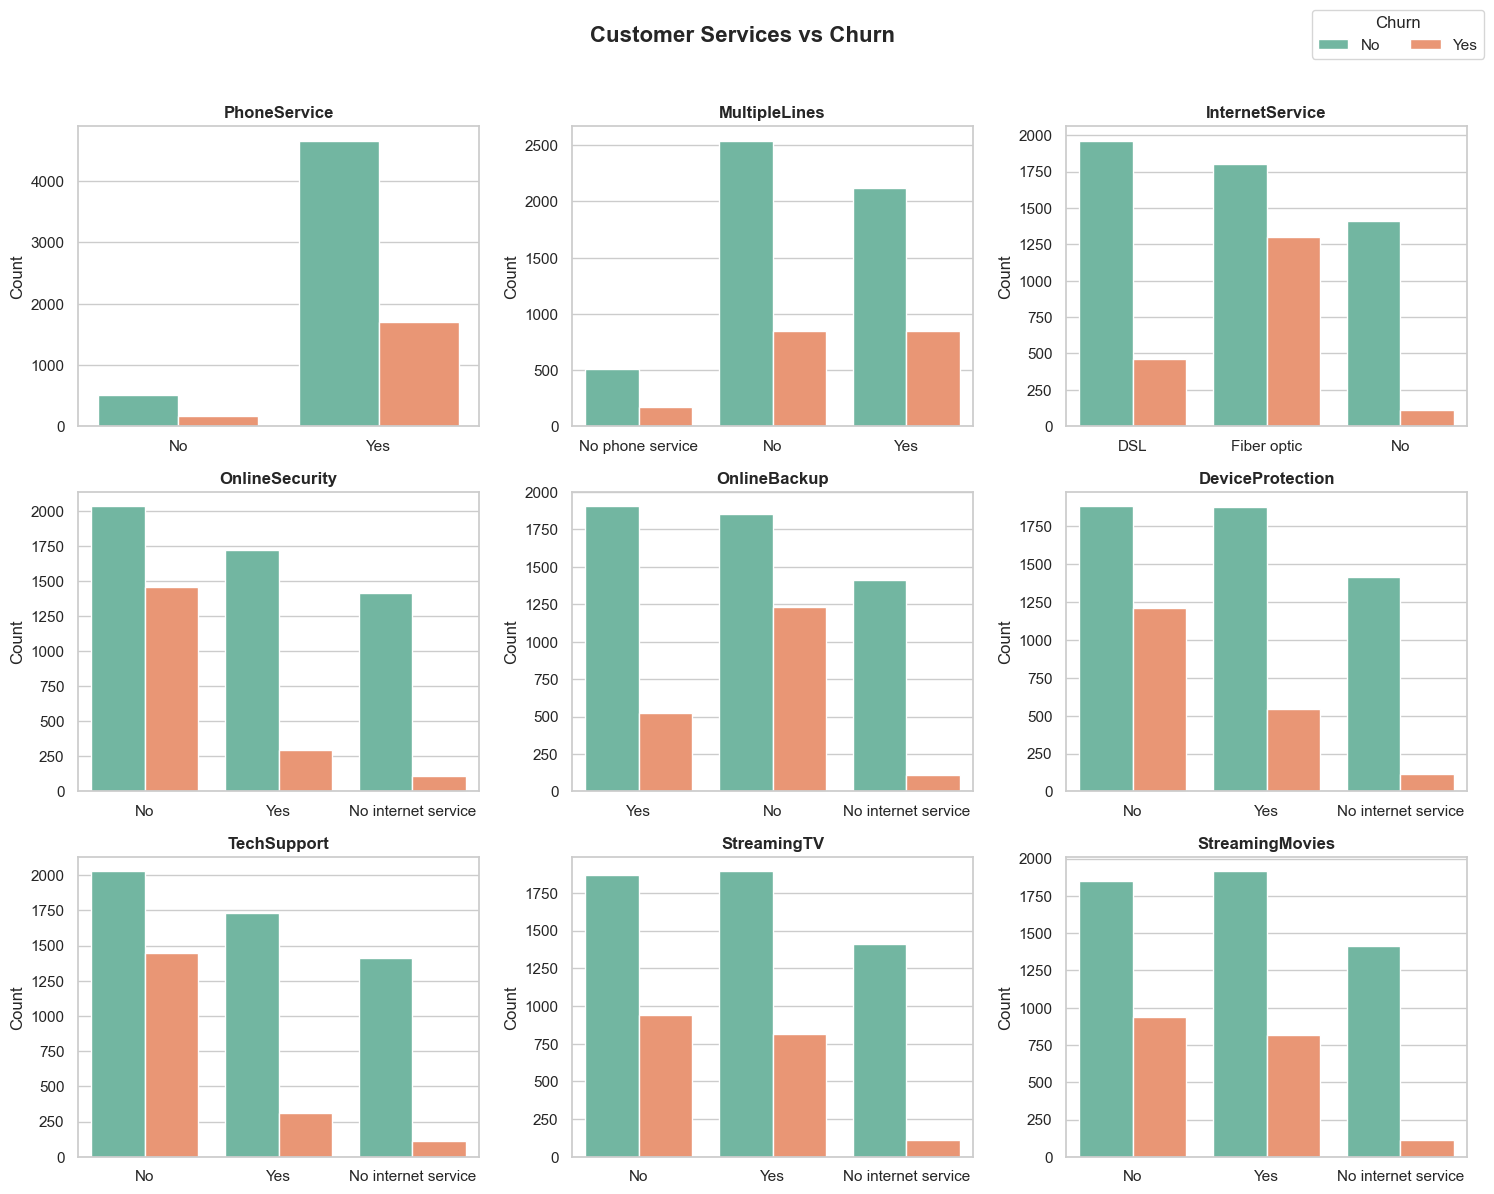

In [243]:
sns.set_style("whitegrid")
sns.set_context("notebook")

cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i], palette='Set2')
    
    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')

# Remove extra legend from each subplot
handles, labels = axes[0].get_legend_handles_labels()
for ax in axes:
    ax.legend_.remove()

# Add one common legend
fig.legend(handles, labels, title='Churn', bbox_to_anchor=(1,1), ncol=2)

plt.suptitle('Customer Services vs Churn', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

#Customers who don’t use services like Online Security, Tech Support, and Device Protection have much higher churn. Fiber optic internet users churn more than DSL users. Customers using more services tend to stay, while those with no internet service show the lowest churn.

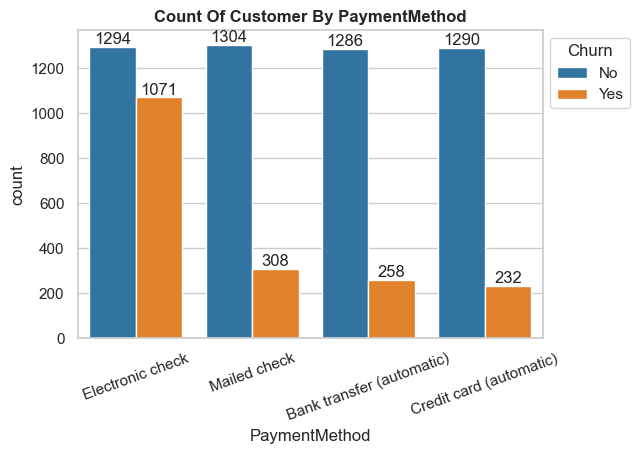

In [269]:
plt.figure(figsize = (6,4))    
ax = sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count Of Customer By PaymentMethod", fontweight="bold")
plt.legend(title='Churn', bbox_to_anchor=(1,1))
plt.xticks(rotation=20)
plt.show()

#customer is likely to churn when he is using electronic check as a payment method